# Prediksi Churn Rate Nasabah Menggunakan ANN

Project ini bertujuan untuk memprediksi apakah nasabah bank akan melanjutkan atau berhenti menggunakan layanan bank menggunakan Algoritma Artificial Neural Network (ANN).

Model prediksi dibuat menggunakan beberapa variable seperti : CreditScore,	Age,	Tenure,	Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary
dengan variabel targetnya adalah Exited

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

## 1 - Data Preprocessing

### About dataset

 Dataset ini berisi 10000 baris dan 14 kolom, dengan detail sebagai berikut:

- RowNumber - Nomor baris
- CustomerId - ID Pelanggan (unik untuk setiap pelanggan)
- Surname - Nama belakang pelanggan
- CreditScore - Skor kredit pelanggan
- Geography - Lokasi geografis pelanggan
- Gender - Jenis kelamin pelanggan
- Age - Umur pelanggan
- Tenure - Lama waktu pelanggan menggunakan layanan bank (dalam bulan)
- Balance - Saldo rekening pelanggan
- NumOfProducts - Jumlah produk yang dimiliki pelanggan
- HasCrCard - Apakah memiliki kartu kredit (1=ya, 0=tidak)
- IsActiveMember - Apakah pelanggan aktif (1=ya, 0=tidak)  
- EstimatedSalary - Estimasi gaji pelanggan
- Exited - Apakah pelanggan berhenti menggunakan layanan (1=ya, 0=tidak) - variabel target

Dataset ini digunakan untuk memprediksi apakah nasabah bank akan berhenti menggunakan layanan (Exited=1) berdasarkan variabel-variabel nasabah lainnya seperti umur, jenis kelamin, lokasi, skor kredit, dan lainnya. Ini adalah data tabel (tabular data) yang siap digunakan untuk membangun model prediksi churn menggunakan algoritma machine learning yaitu ANN.

### Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Churn_Modelling.csv')

## 2- Exploratory Data Analysis

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Melihat gambaran descriptive statistics - Numerical columns

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Melihat gambaran descriptive statistics - Categorical columns

In [ ]:
df.describe(exclude='number')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Melihat nilai Null

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Geography'].unique() # Melihat kolom unique pada kolom 'Geography'

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Age'].describe() # Melakukan basic deskripsi statistic untuk melihat distribusi kolom 'Age'

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

### Visualization

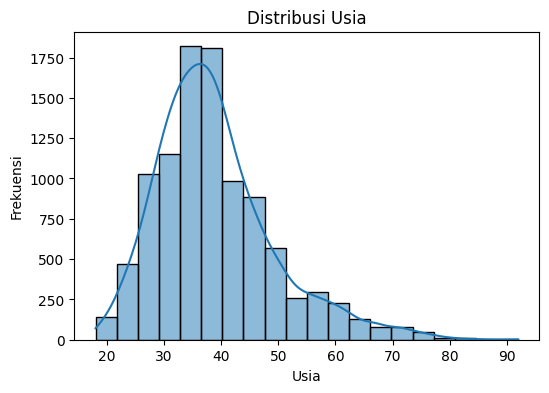

In [ ]:
# Visualisasi distribusi frekuensi data umur
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan visualisasi histogram dan metode describe diatas,
- Kolom 'age' memiliki 25% umur dibawah 32
- Kolom 'age' memiliki 50% umur dibawah 37
- Kolom 'age' memiliki 75% umur dibawah 44


In [ ]:
print(f'Total jumlah orang yang berumur 20-30 : {len(df[df["Age"].between(20,30)])} orang')

Total jumlah orang yang berumur 20-30 : 1919 orang


In [ ]:
print(f'Total jumlah orang yang berumur 30-40 : {len(df[df["Age"].between(30,40)])} orang')

Total jumlah orang yang berumur 30-40 : 4778 orang


In [ ]:
print(f'Total jumlah orang yang berumur 40-50 : {len(df[df["Age"].between(40,50)])} orang')

Total jumlah orang yang berumur 40-50 : 2752 orang


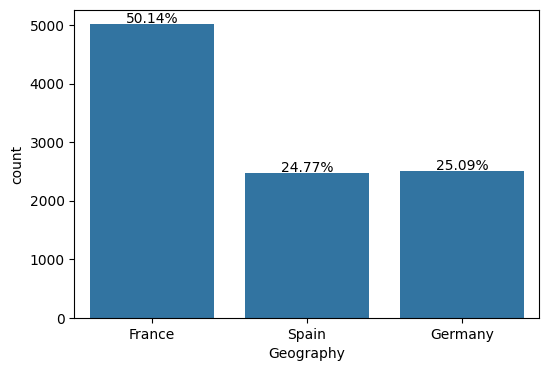

In [ ]:
# Melihat perbandingan jumlah total nasabah pada seluruh data berdasarkan lokasi geografis pelanggan
plt.figure(figsize=(6,4))
total = float(len(df["Geography"]) )
ax = sns.countplot(x="Geography", data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
    height + 20,
    '{:1.2f}%'.format((height/total)*100),
    ha="center")
plt.show()

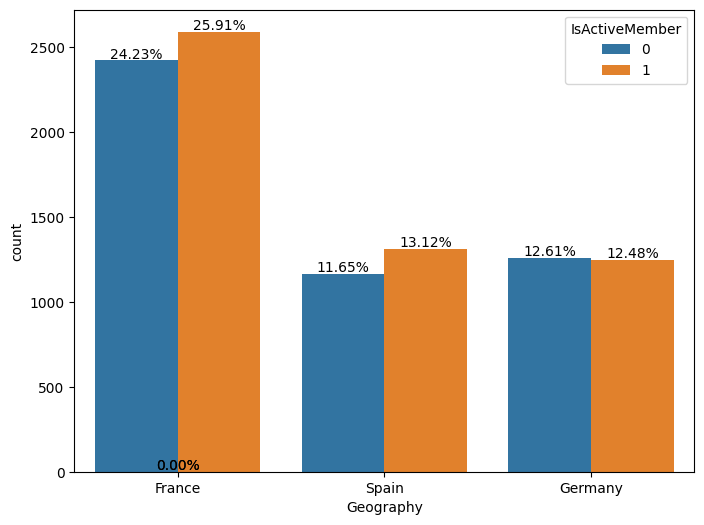

In [ ]:
# Melihat persebaran nasabah yang aktif dan perbandingan berdasarkan lokasi geografis nya
plt.figure(figsize=(8,6))
total = float(len(df["IsActiveMember"]) )
ax = sns.countplot(x="Geography", hue="IsActiveMember", data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
    height + 10,
    '{:1.2f}%'.format((height/total)*100),
    ha="center")
plt.show()

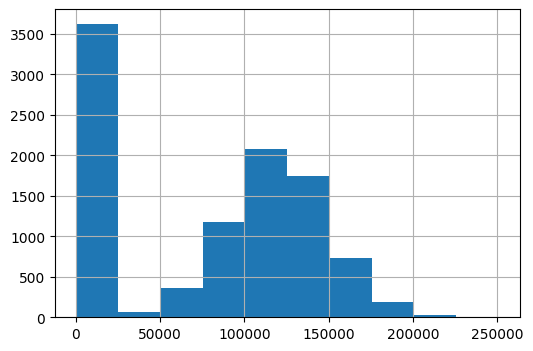

In [ ]:
# Melihat distribusi jumlah saldo nasabah
df['Balance'].hist(figsize=(6,4))
plt.show()

In [ ]:
count = len(df[df['Balance'] == 0])
print(f"Jumlah nasabah dengan total saldo tabungan nya kosong: {count} orang")

Jumlah nasabah dengan total saldo tabungan nya kosong: 3617 orang


In [ ]:
min = 100000
max = 200000
count = len(df[(df['Balance'] >= min) & (df['Balance'] <= max)])
print(f"Jumlah nasabah dengan range saldo tabungan antara {min} dan {max}: {count} orang")

Jumlah nasabah dengan range saldo tabungan antara 100000 dan 200000: 4765 orang


**Distribusi jumlah saldo nasabah:**


*   \> 3600 nasabah tidak memiliki saldo pada Tabungan di bank
*   \> Nasabah dengan range saldo tabungan antara 100000 dan 200000 berjumlah 4765 orang



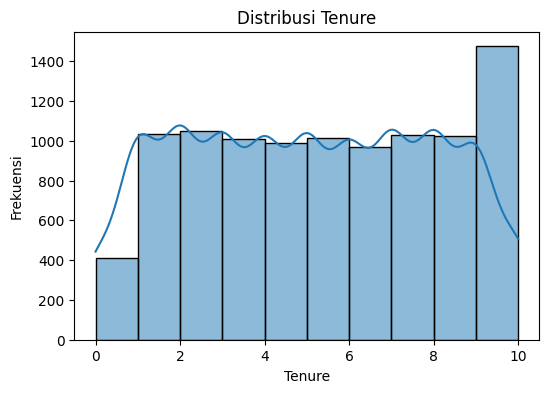

In [ ]:
# Visualisasi distribusi frekuensi data waktu lamanya nasabah terdaftar sebagai pengguna bank
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Tenure', bins=10, kde=True)
plt.title('Distribusi Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frekuensi')
plt.show()

**Distribusi data tenure:**

- Nasabah dengan tenure paling tinggi yaitu 10 tahun
- \> 1400 orang terdaftar sebagai nasabah dengan tenure 10 tahun
- Sekitar 400 orang terdaftar sebagai nasabah baru dengan tenure 1 tahun
- Frekuensi nasabah dengan tenure 2-9 tahun memiliki rata-rata jumlah sekitar 1000 orang



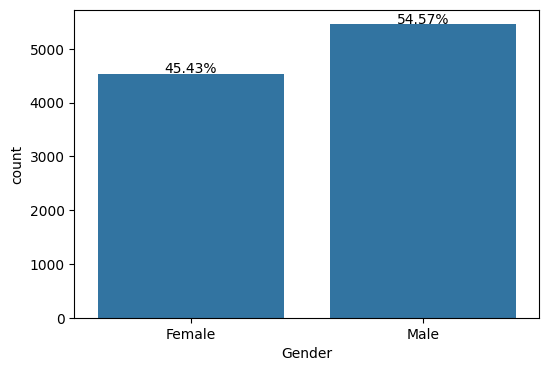

In [ ]:
# Melihat persebaran nasabah pria (Male) dan wanita (Female)
plt.figure(figsize=(6,4))
total = float(len(df["Gender"]) )
ax = sns.countplot(x="Gender", data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
    height + 10,
    '{:1.2f}%'.format((height/total)*100),
    ha="center")
plt.show()

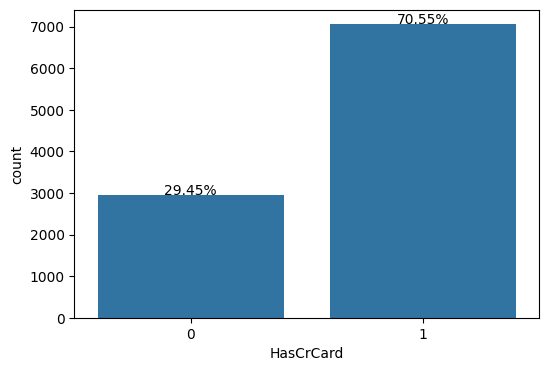

In [ ]:
# Melihat nasabah yang memiliki kartu kredit
plt.figure(figsize=(6,4))
total = float(len(df["HasCrCard"]) )
ax = sns.countplot(x="HasCrCard", data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
    height + 10,
    '{:1.2f}%'.format((height/total)*100),
    ha="center")
plt.show()

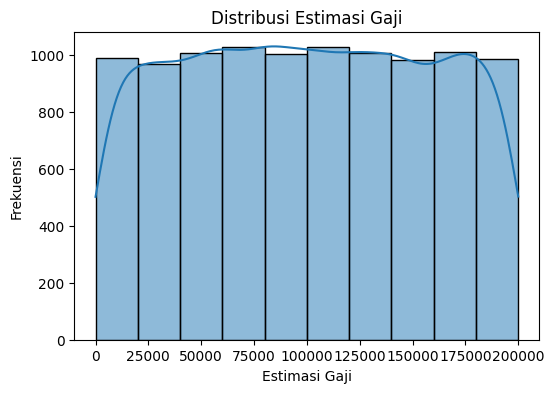

In [ ]:
# Visualisasi distribusi estimasi gaji nasabah yang terdaftar sebagai pengguna bank
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='EstimatedSalary', bins=10, kde=True)
plt.title('Distribusi Estimasi Gaji')
plt.xlabel('Estimasi Gaji')
plt.ylabel('Frekuensi')
plt.show()

### Encoding categorical data

Select feature

In [ ]:
# Pilih dependen and independen variable
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values # Exited

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.5207 - accuracy: 0.7919
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4621 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4429 - accuracy: 0.7950
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.7981
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4151 - accuracy: 0.8048
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3986 - accuracy: 0.8123
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3856 - accuracy: 0.8154
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3762 - accuracy: 0.8336
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3696 - accuracy: 0.8447
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3653 - accura

## Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy}')

[[1526   81]
 [ 198  195]]
Akurasi model: 0.8605


Didapatkan skor akurasi model yaitu 85.8%

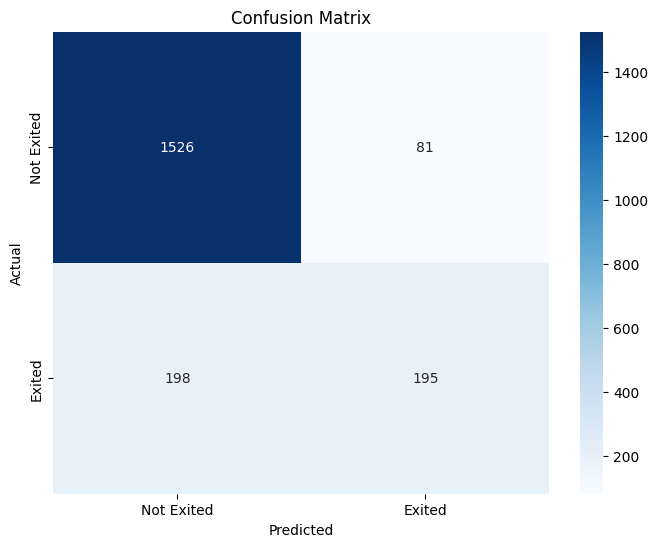

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Predicting the result of a single observation

**Misalkan kita memiliki data baru dengan informasi sebagai berikut:**

Kita akan memprediksi apakah nasabah dengan informasi berikut akan meninggalkan bank?

- Geografi: France

- Credit Score: 700

- Jenis Kelamin: Laki-laki

- Usia: 30 tahun

- Tenure: 3 tahun

- Saldo: \$ 52000

- Jumlah Produk: 2

- Apakah pelanggan ini mempunyai kartu kredit? Ya

- Apakah pelanggan ini Anggota Aktif: Ya

- Perkiraan Gaji: \$ 40000

Jadi, haruskah kita mengucapkan selamat tinggal kepada nasabah tersebut?

**Solution**

In [ ]:
# urutan nilai harus sama sesuai kolom
print(ann.predict(sc.transform([[1, 0, 0, 700, 1, 30, 3, 52000, 2, 1, 1, 40000]])) > 0.5)

1/1 [==============================] - 0s 32ms/step
[[False]]


Model memprediksi bahwa pelanggan ini akan tetap berada di bank!

**Notes:**
1. Semua nilai fitur dimasukkan kedalam sepasang kurung siku ganda. Karena metode "prediksi" selalu mengharapkan array 2D sebagai format masukannya. Dan menempatkan nilai-nilai kita ke dalam sepasang tanda kurung siku membuat inputnya persis seperti array 2D.
2. Negara ***\"France\"*** tidak dimasukkan sebagai string di kolom terakhir tetapi sebagai "1, 0, 0" di tiga kolom pertama. Hal ini karena tentu saja metode prediksi mengharapkan nilai negara yang dikodekan one-hot, dan seperti yang kita lihat di baris pertama matriks fitur X, "Prancis" dikodekan sebagai "1, 0, 0". Dan berhati-hatilah untuk menyertakan nilai-nilai ini di tiga kolom pertama, karena variabel dummy selalu dibuat di kolom pertama.
